In [21]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Load the datasets
diet_path = Path('cleaned_files/merged_income_diet_final.csv') 

diet_df = pd.read_csv(diet_path)

In [23]:
# Filter the dataset to only include the cost of different food types
cost_diet_df = diet_df[(diet_df['Item Code'] == 7007) | (diet_df['Item Code'] == 7008) | (diet_df['Item Code'] == 7009) | (diet_df['Item Code'] == 7010) | (diet_df['Item Code'] == 7011) | (diet_df['Item Code'] == 7012)]
cost_diet_df

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
1,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58
5,Armenia,2017.0,36.897,33.620,8.380,12.360,15.910,20.94,42.40,8745.0,...,0.00000,Asia,Non-OECD,Upper middle income,1,7011,Cost of fruits,PPP dollar per person per day,0.49,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7008,Cost of animal source foods,PPP dollar per person per day,0.62,0.79
523,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.49,0.48
524,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7010,Cost of vegetables,PPP dollar per person per day,0.99,0.67
525,Uruguay,2017.0,4.760,38.898,6.158,10.718,15.432,22.22,45.47,20658.0,...,1.47008,Americas,Non-OECD,High income,234,7011,Cost of fruits,PPP dollar per person per day,0.54,0.81


In [24]:
# Only show the columns necessary for the plots below
selected_columns = ['country', 'Item', 'Unit', 'Y2017', 'incomegroup'] 
df_for_plot = cost_diet_df[selected_columns]
df_for_plot.head(15)

,country,Item,Unit,Y2017,incomegroup
1,Armenia,Cost of starchy staples,PPP dollar per person per day,0.54,Upper middle income
2,Armenia,Cost of animal source foods,PPP dollar per person per day,0.97,Upper middle income
3,Armenia,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,Upper middle income
4,Armenia,Cost of vegetables,PPP dollar per person per day,0.43,Upper middle income
5,Armenia,Cost of fruits,PPP dollar per person per day,0.49,Upper middle income
6,Armenia,Cost of oils and fats,PPP dollar per person per day,0.12,Upper middle income
10,Austria,Cost of starchy staples,PPP dollar per person per day,0.23,High income
11,Austria,Cost of animal source foods,PPP dollar per person per day,0.61,High income
12,Austria,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.36,High income
13,Austria,Cost of vegetables,PPP dollar per person per day,0.70,High income


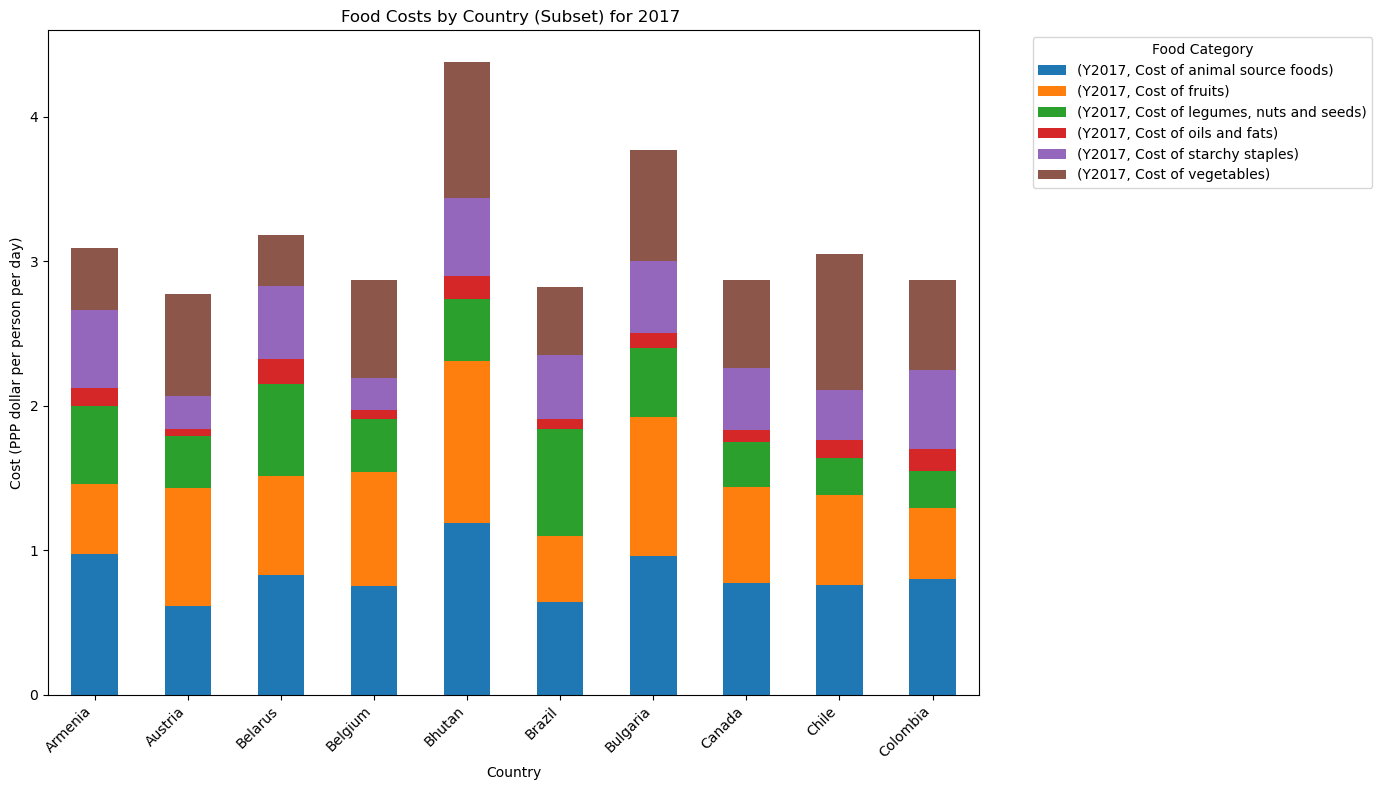

In [25]:
# Plot a stacked bar chart of Food Costs by Area (Subset)
df_subset = df_for_plot[df_for_plot['country'].isin(df_for_plot['country'].unique()[:10])]

df_pivot = df_subset.pivot_table(index='country', columns='Item', values=['Y2017', ])

df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xticks(rotation=45, ha='right')

plt.title('Food Costs by Country (Subset) for 2017 ')
plt.xlabel('Country')
plt.ylabel('Cost (PPP dollar per person per day)')
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Output/Stacked_Food_Costs_by_Country.png")

plt.show()

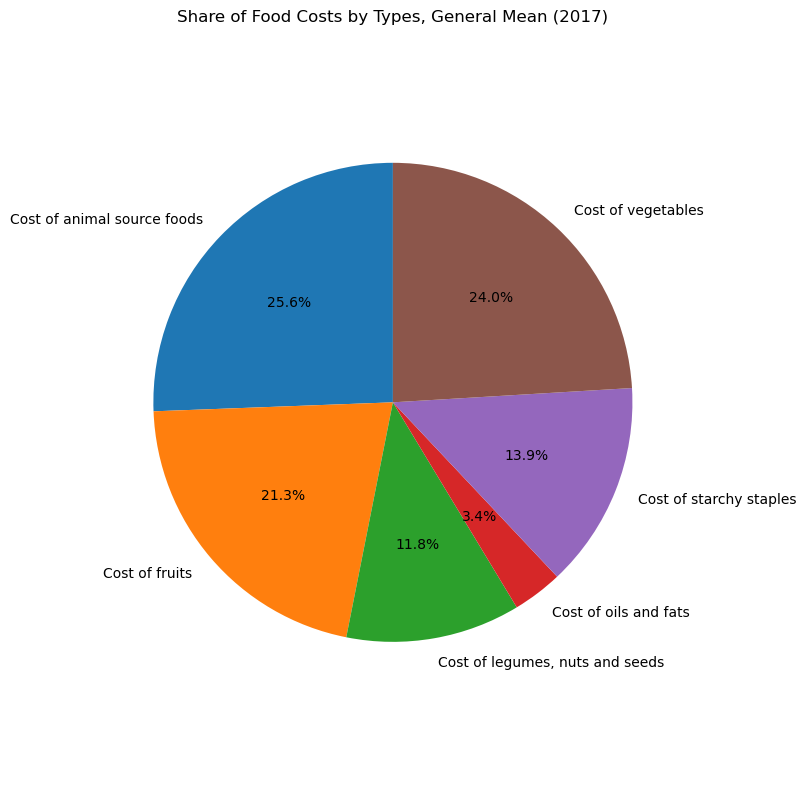

In [26]:
# Group by 'Item' and sum the 'Y2017' values for each item
item_costs = df_for_plot.groupby('Item')['Y2017'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(item_costs, labels=item_costs.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Food Costs by Types, General Mean (2017)')
plt.axis('equal')
plt.tight_layout()
plt.savefig("Output/Pie_Share_Food_Costs_Type.png")

plt.show()

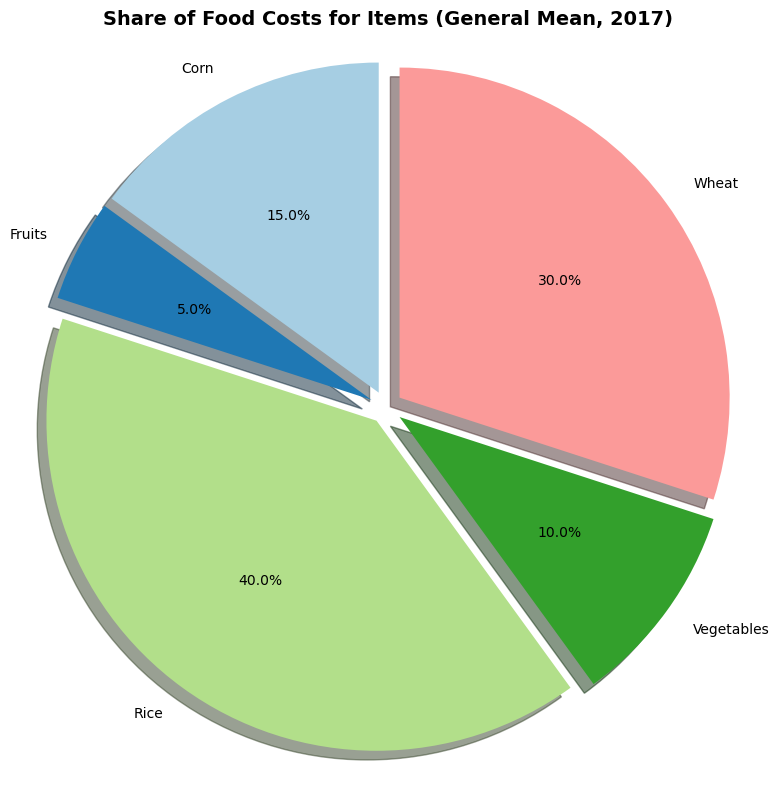

In [27]:
# Pie Chart Improvement on Design
data = {'Item': ['Rice', 'Wheat', 'Corn', 'Vegetables', 'Fruits'],
        'Y2017': [400, 300, 150, 100, 50]}

df_for_plot_improved = pd.DataFrame(data)

# Group by 'Item' and sum the 'Y2017' values for each item
item_costs = df_for_plot_improved.groupby('Item')['Y2017'].sum()

# Colors and Explode for better visibility of segments
colors = plt.cm.Paired(range(len(item_costs)))  # Color scheme
explode = [0.05] * len(item_costs)  # Slightly explode all segments

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(item_costs, labels=item_costs.index, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)

# Add title and styling
plt.title('Share of Food Costs for Items (General Mean, 2017)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.tight_layout()

# Save the figure
plt.savefig("Output/Pie_Share_Food_Costs_Items.png")

# Show the pie chart
plt.show()

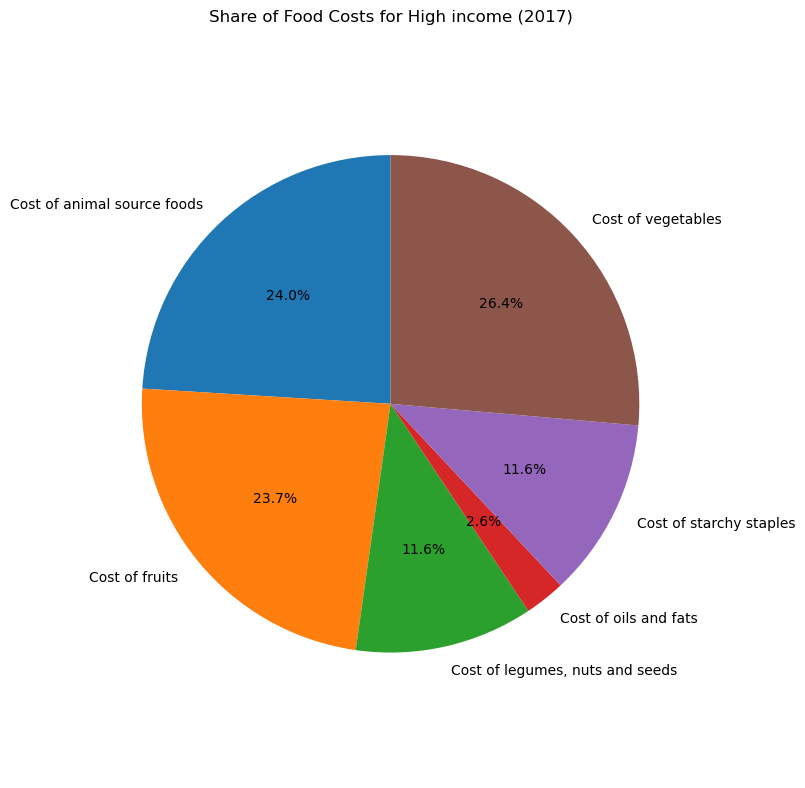

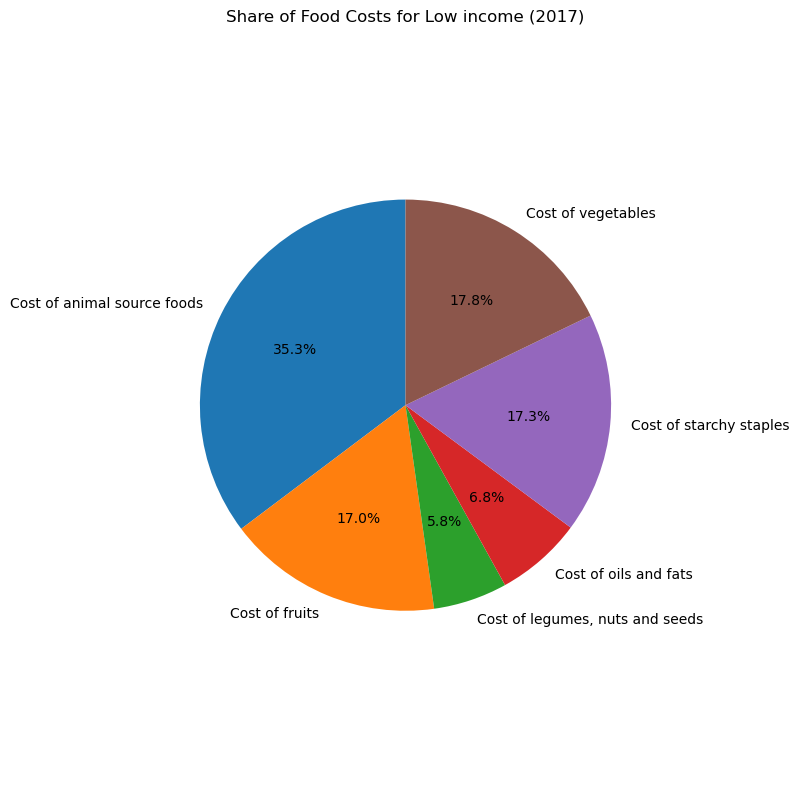

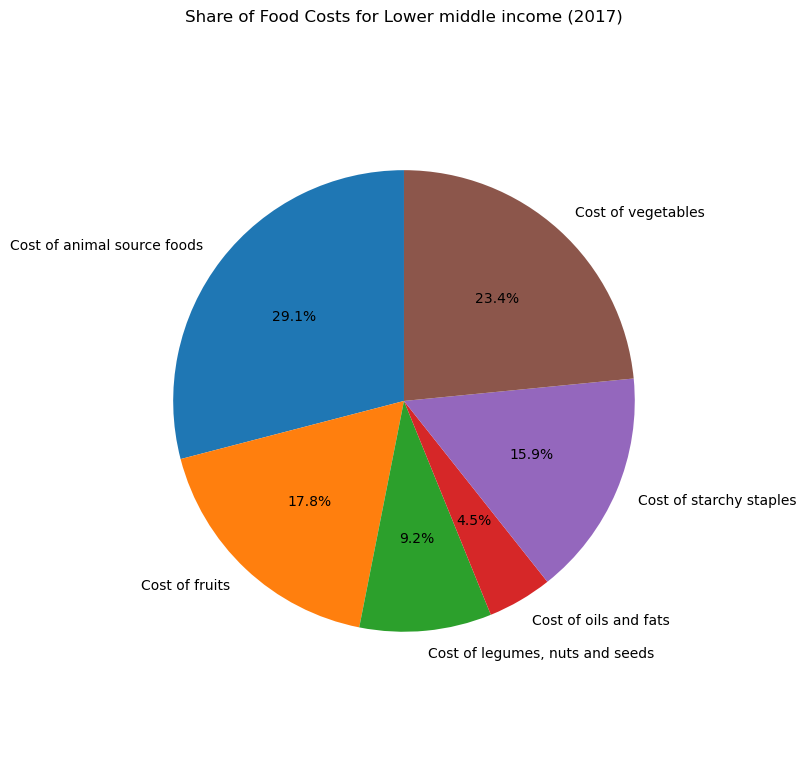

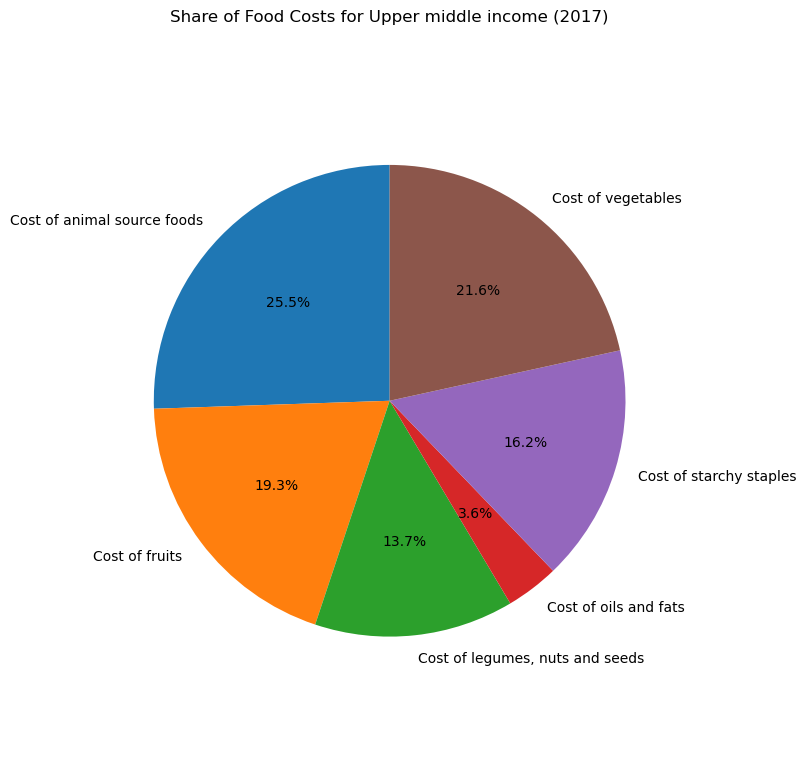

In [28]:
# Group the data by 'incomegroup' and 'Item', and sum the 'Y2017' values
grouped_by_income = df_for_plot.groupby(['incomegroup', 'Item'])['Y2017'].sum().unstack()

# Iterate over each income group to create pie charts
for incomegroup in grouped_by_income.index:
    plt.figure(figsize=(8, 8))
    
    # Get the food cost data for this income group
    food_data = grouped_by_income.loc[incomegroup]
    
    plt.pie(food_data, labels=food_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Share of Food Costs for {incomegroup} (2017)')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.tight_layout()
    plt.savefig(f"Output/Pie_{incomegroup}.png")
    plt.show()